# <span style = "color: green"> Employee attrition Classification </span>

***

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's Dive into it

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [2]:
df=pd.read_csv(r"C:\Users\Sanja\Desktop\Employee Attrition Files\HR-Employee-Attrition.csv")

### Check head

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [5]:
df.tail()




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### Check shape

In [6]:
df.shape

(1470, 35)

### View info about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [8]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [10]:
categorical_columns=df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique Values in {col}={df[col].unique()}")

Unique Values in Attrition=['Yes' 'No']
Unique Values in BusinessTravel=['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique Values in Department=['Sales' 'Research & Development' 'Human Resources']
Unique Values in EducationField=['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique Values in Gender=['Female' 'Male']
Unique Values in JobRole=['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique Values in MaritalStatus=['Single' 'Married' 'Divorced']
Unique Values in Over18=['Y']
Unique Values in OverTime=['Yes' 'No']


### Check the number of unique values in all columns

In [11]:
for cols in df.columns:
    print(f"Number of unique elements in {cols} are : {df[cols].nunique()}")
    

Number of unique elements in Age are : 43
Number of unique elements in Attrition are : 2
Number of unique elements in BusinessTravel are : 3
Number of unique elements in DailyRate are : 886
Number of unique elements in Department are : 3
Number of unique elements in DistanceFromHome are : 29
Number of unique elements in Education are : 5
Number of unique elements in EducationField are : 6
Number of unique elements in EmployeeCount are : 1
Number of unique elements in EmployeeNumber are : 1470
Number of unique elements in EnvironmentSatisfaction are : 4
Number of unique elements in Gender are : 2
Number of unique elements in HourlyRate are : 71
Number of unique elements in JobInvolvement are : 4
Number of unique elements in JobLevel are : 5
Number of unique elements in JobRole are : 9
Number of unique elements in JobSatisfaction are : 4
Number of unique elements in MaritalStatus are : 3
Number of unique elements in MonthlyIncome are : 1349
Number of unique elements in MonthlyRate are : 

### Print out the names of the columns having only one unique values 

In [12]:
one_unq=df.columns[df.nunique()==1].tolist()
one_unq

['EmployeeCount', 'Over18', 'StandardHours']

### Drop these columns as they won't be useful in our predicition

In [13]:
df.drop(columns=one_unq,inplace=True)
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


### Drop EmployeeNumber column aswell

In [14]:
df.drop(columns="EmployeeNumber",inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Create following groupby valuecounts

In [15]:
df.groupby(["Department","EducationField"])["Gender"].value_counts()

Department              EducationField    Gender
Human Resources         Human Resources   Male       19
                                          Female      8
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Male       11
                                          Female      2
                        Other             Male        3
                        Technical Degree  Male        3
                                          Female      1
Research & Development  Life Sciences     Male      274
                                          Female    166
                        Medical           Male      211
                                          Female    152
                        Other             Male       39
                                          Female     25
                        Technical Degree  Male       58
                                          Female     36

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

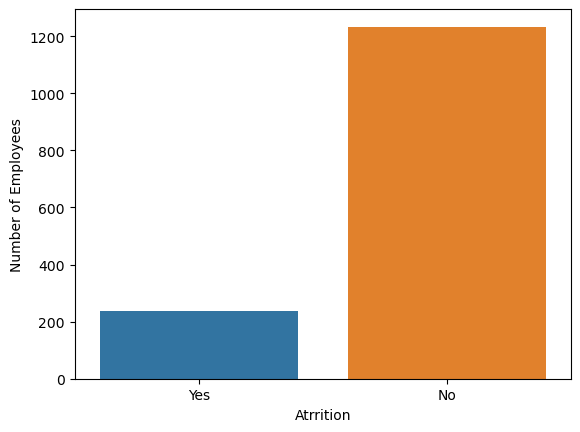

In [16]:
sns.countplot(data=df,x="Attrition",hue="Attrition")
plt.xlabel("Atrrition")
plt.ylabel("Number of Employees")
plt.show()

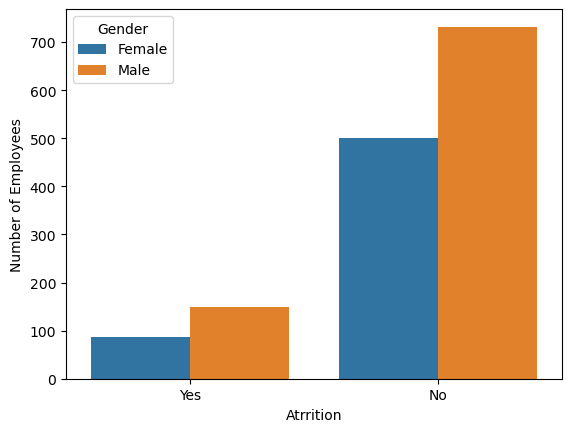

In [17]:
sns.countplot(data=df,x="Attrition",hue="Gender")
plt.xlabel("Atrrition")
plt.ylabel("Number of Employees")
plt.show()

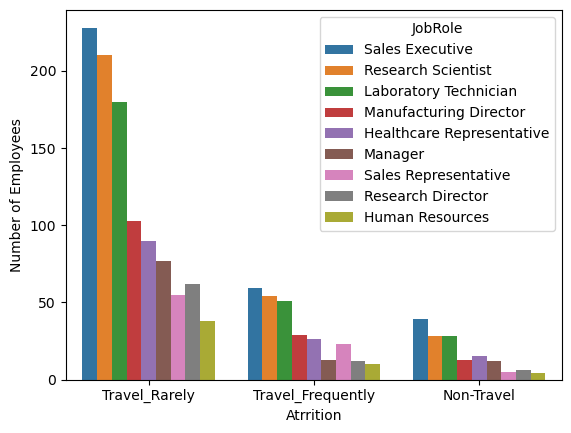

In [18]:
sns.countplot(data=df,x="BusinessTravel",hue="JobRole")
plt.xlabel("Atrrition")
plt.ylabel("Number of Employees")
plt.show()

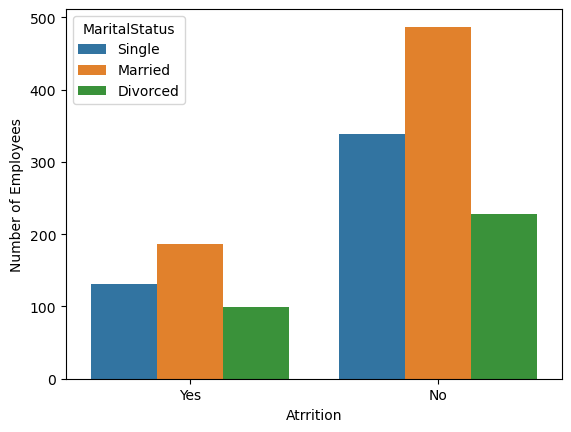

In [19]:
sns.countplot(data=df,x="OverTime",hue="MaritalStatus")
plt.xlabel("Atrrition")
plt.ylabel("Number of Employees")
plt.show()

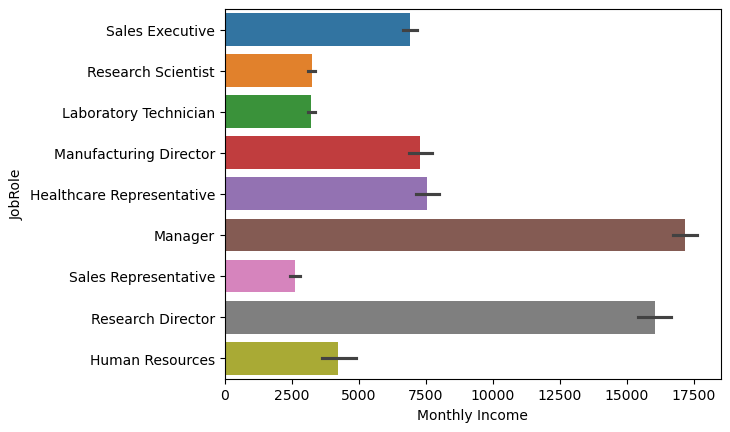

In [20]:
sns.barplot(data=df,x="MonthlyIncome",y="JobRole",hue="JobRole")
plt.xlabel("Monthly Income")
plt.ylabel("JobRole")
plt.show()

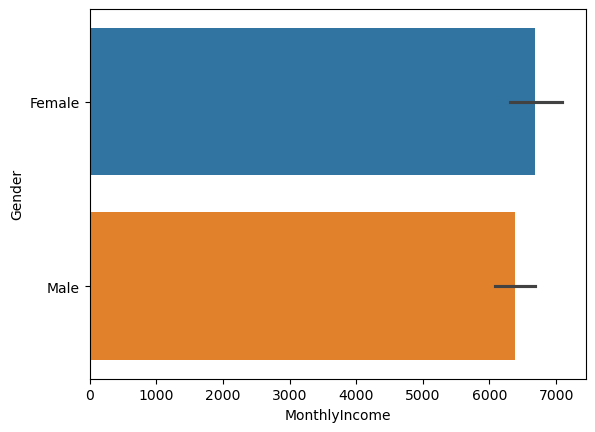

In [21]:
sns.barplot(data=df,x="MonthlyIncome",y="Gender",hue="Gender")
plt.xlabel("MonthlyIncome")
plt.ylabel("Gender")
plt.show()

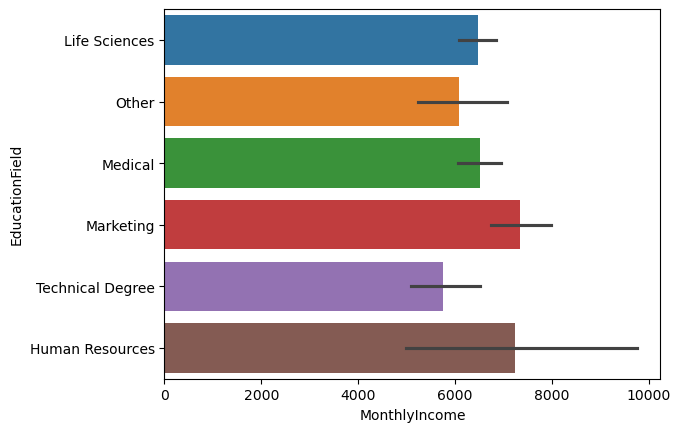

In [22]:
sns.barplot(data=df,x="MonthlyIncome",y="EducationField",hue="EducationField")
plt.xlabel("MonthlyIncome")
plt.ylabel("EducationField")
plt.show()

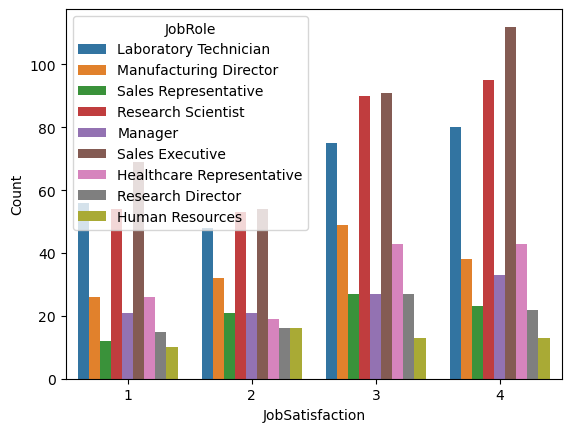

In [23]:
sns.countplot(data=df,x="JobSatisfaction",hue="JobRole")
plt.xlabel("JobSatisfaction")
plt.ylabel("Count")
plt.show()

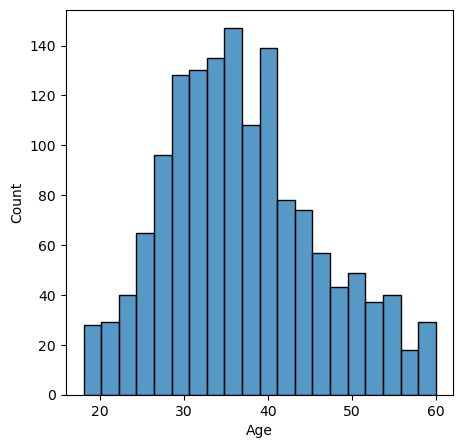

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x="Age",bins=20,kde=False)
plt.xlabel("Age")
plt.show()

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [25]:
df["Attrition"]=df["Attrition"].map({"Yes":1,"No":0})

In [26]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [27]:
categorical_columns=df.select_dtypes(include="object").columns
newdf=pd.get_dummies(df,columns=categorical_columns,drop_first=True,dtype=int)

In [28]:
newdf.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Check the shape of our new dataset

In [29]:
newdf.shape

(1470, 45)

#### Print unique values in our new dataframe

In [30]:
for i in newdf.columns:
    print(f"Unique Values in {i} are : {newdf[i].unique()}")

Unique Values in Age are : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique Values in Attrition are : [1 0]
Unique Values in DailyRate are : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 116

#### Split the columns into input and target variables (X and y)

In [31]:
X=newdf.drop(columns='Attrition')
y=newdf['Attrition']

#### Carry out Feature scaling using StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
x_scaled=model.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=X.columns)

In [33]:


X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


### 






Split the dataset into training and testing set

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Machine Learning Models

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.model_selection import cross_val_score

In [37]:
model=LogisticRegression()
lr=model.fit(X_train,y_train)

In [38]:
lr

LogisticRegression()

In [39]:
y_pred=model.predict(X_test)

In [40]:
score=model.score(X_train,y_train)
score

0.8901846452866861

In [41]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy_score={accuracy}")
conf_m=metrics.confusion_matrix(y_test,y_pred,labels=[0, 1])
print(f"Confusion Matrix = {conf_m}")
cls=metrics.classification_report(y_test,y_pred)
print(f"Classification Report = {cls}")
crs=cross_val_score(model,X,y,cv=3)
print(f"Classification Report = {crs}")

Accuracy_score=0.8888888888888888
Confusion Matrix = [[360   6]
 [ 43  32]]
Classification Report =               precision    recall  f1-score   support

           0       0.89      0.98      0.94       366
           1       0.84      0.43      0.57        75

    accuracy                           0.89       441
   macro avg       0.87      0.71      0.75       441
weighted avg       0.88      0.89      0.87       441

Classification Report = [0.8877551  0.84897959 0.89183673]


<span style = "color:orange"> Visualize confusion matrix </span>

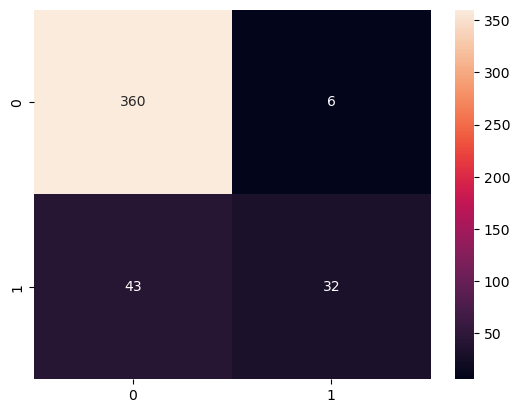

In [42]:
sns.heatmap(conf_m,annot=True,fmt='d')
plt.show()

### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
model=RandomForestClassifier(n_jobs=-1)
rgc=model.fit(X_train,y_train)
rgc

RandomForestClassifier(n_jobs=-1)

In [45]:
params={'max_depth':[None,1,5,10],'n_estimators':[16,32,50,100],'random_state':[1,10,20,42]}
grid=GridSearchCV(model,params,cv=3,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [46]:
print(f"Best Estimator = {grid.best_estimator_}")
print(f"Best parameters are : {grid.best_params_}")
print(f"best Score = {grid.score(X_test,y_test)}")

Best Estimator = RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=-1,
                       random_state=42)
Best parameters are : {'max_depth': 10, 'n_estimators': 32, 'random_state': 42}
best Score = 0.8458049886621315


<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [47]:
y_pred = grid.predict(X_test)


In [48]:
accr=metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy Score={accr}")
conf=metrics.confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = {conf}")
cls_r=metrics.classification_report(y_test,y_pred)
print(f"classification report ={cls_r}")
cros_v=cross_val_score(model,X,y,cv=3)
print(f"Cross Validation Score = {cros_v}")


Accuracy Score=0.8458049886621315
Confusion Matrix = [[365   1]
 [ 67   8]]
classification report =              precision    recall  f1-score   support

           0       0.84      1.00      0.91       366
           1       0.89      0.11      0.19        75

    accuracy                           0.85       441
   macro avg       0.87      0.55      0.55       441
weighted avg       0.85      0.85      0.79       441

Cross Validation Score = [0.85306122 0.85918367 0.85714286]


<span style = "color:orange"> Visualize confusion matrix </span>

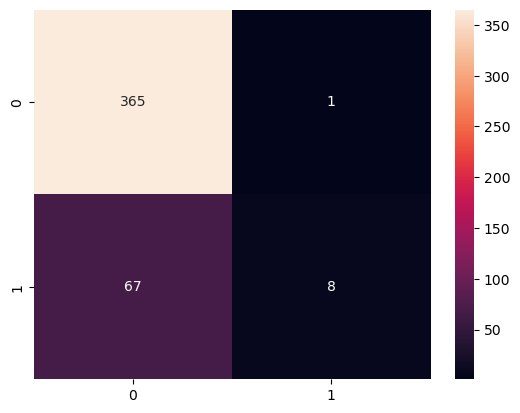

In [49]:
sns.heatmap(conf,annot=True,fmt='d')
plt.show()

### Support Vector Machine

In [50]:
from sklearn.svm import SVC
model=SVC()
svm=model.fit(X_train,y_train)

In [51]:
params={'C':[0.75,.85,0.95,1],'degree':[3,4,5],'kernel':['linear','poly','rbf','sigmoid']}
grid=GridSearchCV(model,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [53]:
print(f"Best Parameter= {grid.best_params_}")
print(f"Best Estimator is : {grid.best_estimator_}")
print(f"Best Score ={grid.score(X_test,y_test)}")

Best Parameter= {'C': 0.75, 'degree': 3, 'kernel': 'linear'}
Best Estimator is : SVC(C=0.75, kernel='linear')
Best Score =0.8888888888888888


In [54]:
y_pred=grid.predict(X_test)

In [62]:
acr=metrics.accuracy_score(y_test,y_pred)
conf_matrix=metrics.confusion_matrix(y_test,y_pred)
cl_report=metrics.classification_report(y_test,y_pred)
cr_v=cross_val_score(model,X,y,cv=5)
print(f"Accuracy = {acr}")
print(f"Confusion_matrix={conf_matrix}")
print(f"Classification Report = {cl_report}")
print(f"Cross Validation Score= {cr_v.mean()}")

Accuracy = 0.8888888888888888
Confusion_matrix=[[365   1]
 [ 48  27]]
Classification Report =               precision    recall  f1-score   support

           0       0.88      1.00      0.94       366
           1       0.96      0.36      0.52        75

    accuracy                           0.89       441
   macro avg       0.92      0.68      0.73       441
weighted avg       0.90      0.89      0.87       441

Cross Validation Score= 0.8673469387755102


<span style = "color:orange"> Visualize confusion matrix </span>

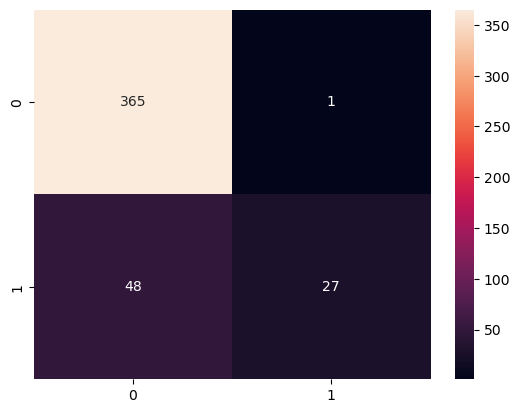

In [64]:
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.show()

### AdaBoost: Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=50,learning_rate=1,algorithm="SAMME",random_state=42)
ada=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
con_f=metrics.confusion_matrix(y_test,y_pred)
cls=metrics.classification_report(y_test,y_pred)
crs_val=cross_val_score(model,X,y,cv=5)
scr=model.score(X_test,y_test)
print(f"Score ={scr}")
print(f"accuracy={acc}")
print(f"confusion matrix = {con_f}")
print(f"Classification Report = {cls}")
print(f"Cross Validation Score = {crs_val.mean()}")


Score =0.873015873015873
accuracy=0.873015873015873
confusion matrix = [[365   1]
 [ 55  20]]
Classification Report =               precision    recall  f1-score   support

           0       0.87      1.00      0.93       366
           1       0.95      0.27      0.42        75

    accuracy                           0.87       441
   macro avg       0.91      0.63      0.67       441
weighted avg       0.88      0.87      0.84       441

Cross Validation Score = 0.8727891156462585


<span style = "color:orange"> Visualize confusion matrix </span>

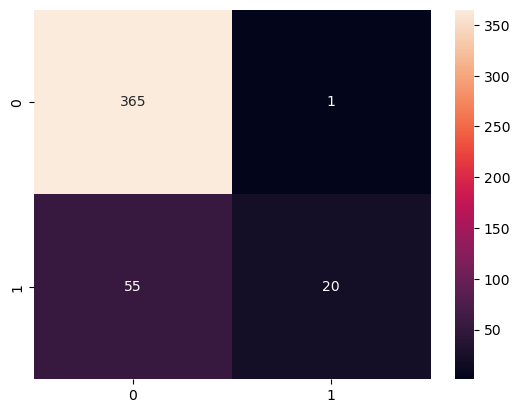

In [72]:
sns.heatmap(con_f,annot=True,fmt='d')
plt.show()

### View score of different models in one dataframe

In [83]:
model_scores = {
    "Logistic Regression": lr.score(X_test, y_test),
    "Support Vector Classifier": svm.score(X_test, y_test),
    "Random Forest Classifier": rgc.score(X_test, y_test),
    "AdaBoost Classifier": acr
}
df_scores = pd.DataFrame(list(model_scores.items()), columns=["Models", "Score"])
df_scores.sort_values(by="Score",ascending=False).reset_index(drop=True)

,Models,Score
0,Logistic Regression,0.888889
1,AdaBoost Classifier,0.888889
2,Random Forest Classifier,0.850340
3,Support Vector Classifier,0.848073


,Models,Score
2,Gradient Boost Classifier,0.886304
1,Logistic Regression,0.877566
3,Support Vector Classifier,0.861042
0,Random Forest Classifier,0.856173


## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [88]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pd.DataFrame(pca.fit_transform(X))

#### Apply the mapping (transform) to both the training set and the test set.

In [89]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [90]:
from sklearn.ensemble import RandomForestClassifier

#### Create RandomForest model with the best parameter we got earlier and train it

In [98]:
best_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=50,
    random_state=10,
    n_jobs=-1                 # optional, makes training faster
)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_best))

print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_best))

print("Classification Report:\n", metrics.classification_report(y_test, y_pred_best))

Accuracy = 0.8480725623582767
Confusion Matrix:
 [[365   1]
 [ 66   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       366
           1       0.90      0.12      0.21        75

    accuracy                           0.85       441
   macro avg       0.87      0.56      0.56       441
weighted avg       0.86      0.85      0.80       441



#### Check the score of our model

In [97]:
best_model.score(X_test,y_test)

0.8435374149659864

#### Make predictions with X_test and check the accuracy score

### Print Confusion matrix and Classification report

# <span style = "color:green"> Good Job! You have Successfully completed one Capstone Project </span>

***